<a href="https://colab.research.google.com/github/Ricardinho146/imersaocssalura/blob/master/AN%C3%81LISE_DE_PRECIS%C3%83O_DE_POSICIONAMENTO_DA_FURA%C3%87%C3%83O_(PLACAS_DE_CIRCUITO_IMPRESSO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição do Teste:

Teste realizado para a avaliação de desempenho relacionado a acuracidade do posicionamento dos furos de dois modelos de brocas com geometrias destintas.

 **Detalhamento:** 


1.   Para cada broca foram realizados 15.000 furos em 5 ciclos de 3.000 furos, sendo o 1° Ciclo com broca Nova e os 4 seguintes foram realizados com brocas afiadas;

2.   Em cada ciclo foi utilizado 1 pacote com 3 peças empilhadas no pacote;

3.   Ao término de cada ciclo as brocas foram encaminhadas para afiação e a ultima peça de cada  pacote de furação foi segregada e encaminha da o Equipamento de Inspeção Óptica Automatizada, no qual foram verificados os posicionamentos de todos os furos realizados;


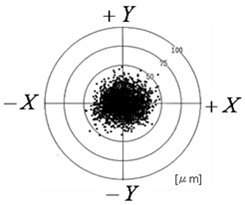






<h2> <strong>Modelos das Brocas</strong></h2>



*   UCW: Broca  Single Flute;
*   UCK: Broca Single Edge.


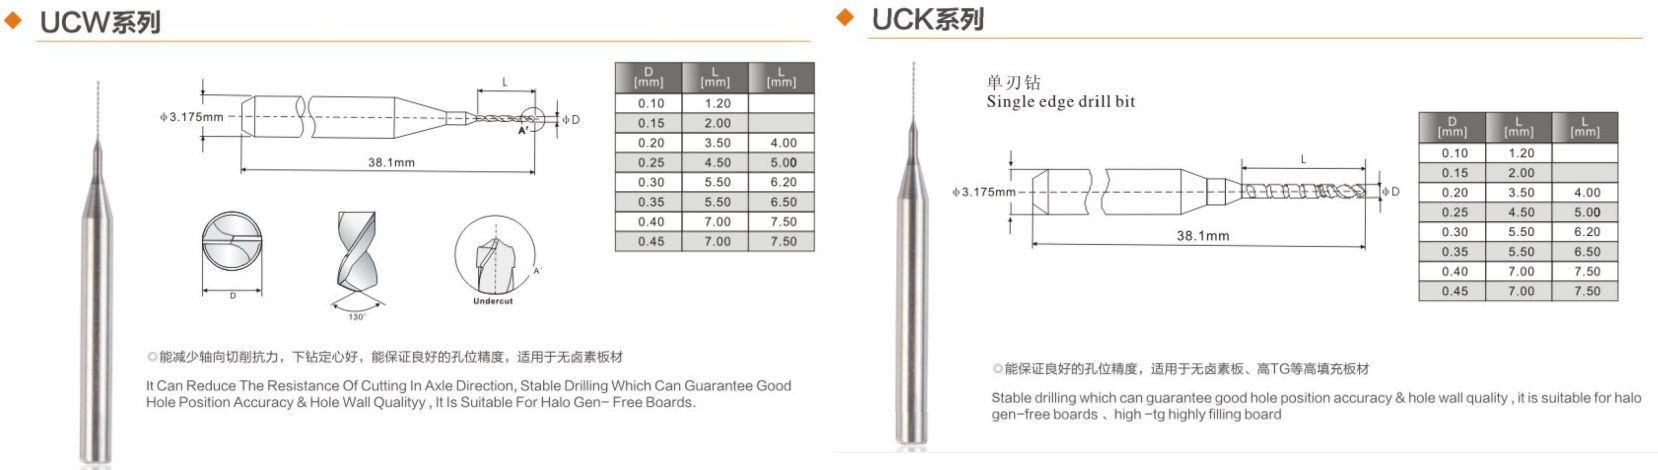

<h2><strong> Pacote de furação</strong></h2>

**Detalhamento do Pacote de Furação:**

*  Material de entrada: 1 folha de aluminio 0.20mm;
*  Laminado: 3 laminados FR4 de 1.20mm - 4 camadas - Camadas do cobre Interno 1 Onça e camadas de cobre Externo 1/4 Onça;
*  Material de Saida: Snow White 2.20mm;
*  Diâmetro dos furos 0.30mm.

**Imagem de Exemplo:**

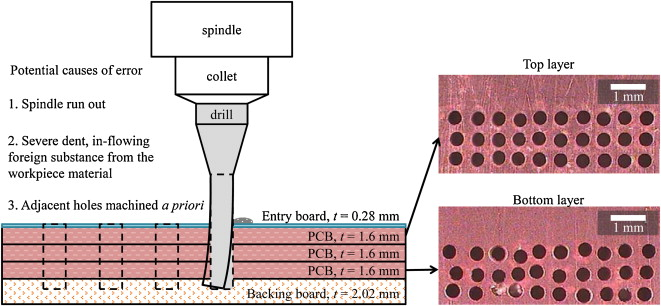

<h2></strong> Equipamento de  inspeção Óptica Automatizada (OPTEK)</strong></h2>

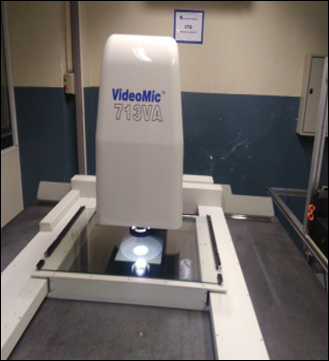

<h2><strong> Importando Bibliotecas</strong></h2>

In [1]:
import pandas as pd
from glob import  glob
import matplotlib.pyplot as plt
import matplotlib
from  matplotlib.patches import Circle
import seaborn as sns
import numpy as np


<h2><strong>Definindo o estilo para os Gráficos do Matplotlib</strong></h2>

In [2]:
print(plt.style.available)
plt.style.use('seaborn-colorblind')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<h2><strong> Carregando e armazendo as coordenadas do programa de furação em um Dataframe Pandas</strong></h2>

In [3]:
coordenadas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analise de Dispersão de Furos /coordenadas.Csv',encoding = "ISO-8859-1", sep=';',decimal=",")
coordenadas.head(5)

,Name,X,Y,Diâmetro
0,Circle 5,26.5,-16.5,0.3
1,Circle 6,29.5,-16.5,0.3
2,Circle 7,32.5,-16.5,0.3
3,Circle 8,35.5,-16.5,0.3
4,Circle 9,38.5,-16.5,0.3


<h2><strong>Plotando um gráfico com as coordenadas do programa de furação</strong></h2>

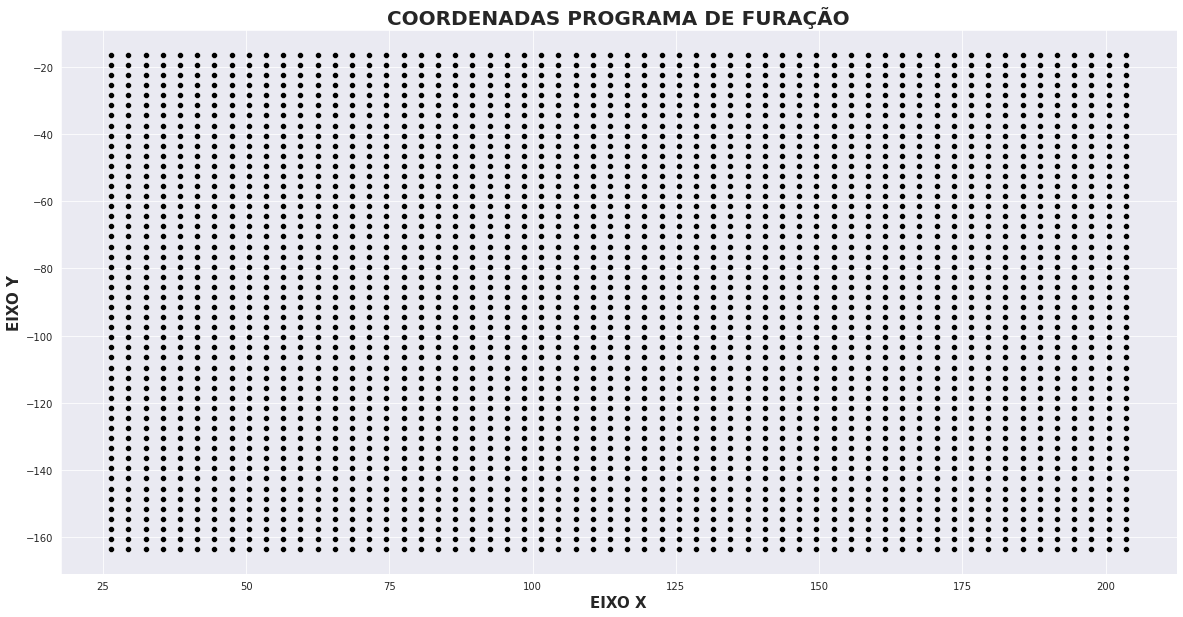

In [4]:
sns.set_style("darkgrid") # Definindo o Estilo do Gráfico


plt.figure(figsize=(20, 10));
sns.scatterplot(data=coordenadas, x="X", y="Y", color = 'black');
plt.title('COORDENADAS PROGRAMA DE FURAÇÃO', fontsize=20, fontweight='bold');
plt.xlabel('EIXO X', fontsize=15, fontweight='bold');
plt.ylabel('EIXO Y', fontsize=15, fontweight='bold');

plt.show();


<h2><strong> Carregando a Base de dados com os resultados de posicionamento dos furos medidos</strong></h2>

Extraindo todos os arquivos da pasta em Medidas que está armazenada em meu Google Drive.

In [5]:
arquivos = sorted(glob(r'/content/drive/MyDrive/Colab Notebooks/Analise de Dispersão de Furos /Medidas/*.Csv'))
arquivos

['/content/drive/MyDrive/Colab Notebooks/Analise de Dispersão de Furos /Medidas/UCKA-3000-A0-STK3.Csv',
 '/content/drive/MyDrive/Colab Notebooks/Analise de Dispersão de Furos /Medidas/UCKA-3000-A1-STK3.Csv',
 '/content/drive/MyDrive/Colab Notebooks/Analise de Dispersão de Furos /Medidas/UCKA-3000-A2-STK3.Csv',
 '/content/drive/MyDrive/Colab Notebooks/Analise de Dispersão de Furos /Medidas/UCKA-3000-A3-STK3.Csv',
 '/content/drive/MyDrive/Colab Notebooks/Analise de Dispersão de Furos /Medidas/UCKA-3000-A4-STK3.Csv',
 '/content/drive/MyDrive/Colab Notebooks/Analise de Dispersão de Furos /Medidas/UCWA-3000-A0-STK3.Csv',
 '/content/drive/MyDrive/Colab Notebooks/Analise de Dispersão de Furos /Medidas/UCWA-3000-A1-STK3.Csv',
 '/content/drive/MyDrive/Colab Notebooks/Analise de Dispersão de Furos /Medidas/UCWA-3000-A2-STK3.Csv',
 '/content/drive/MyDrive/Colab Notebooks/Analise de Dispersão de Furos /Medidas/UCWA-3000-A3-STK3.Csv',
 '/content/drive/MyDrive/Colab Notebooks/Analise de Dis

Elaborando um Dataframe com todos os orquivos extraidos da pasta

In [6]:
medidas = pd.concat((pd.read_csv(arquivo, encoding = "ISO-8859-1", sep=';',decimal=",") for arquivo in arquivos), ignore_index=True)


Checando os dados

In [7]:
medidas.head(5)

,Name,Dev_X,Dev_Y,X,Y,D,Model,Repoint
0,Circle 9,-0.0242,0.0238,26.4758,-16.4762,0.2807,UCKA,0
1,Circle 10,-0.0220,0.0099,29.4780,-16.4901,0.2809,UCKA,0
2,Circle 11,-0.0368,0.0212,32.4632,-16.4788,0.2840,UCKA,0
3,Circle 12,-0.0220,0.0278,35.4780,-16.4722,0.2852,UCKA,0
4,Circle 13,-0.0021,-0.0035,38.4979,-16.5035,0.2837,UCKA,0


Removendo os dados não significativos para a analise.

In [8]:

dados_analisaveis = medidas.drop('X', axis= 1)
dados_analisaveis = dados_analisaveis.drop('Y', axis = 1)
dados_analisaveis = dados_analisaveis.drop('Name', axis = 1)
dados_analisaveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Dev_X    29999 non-null  float64
 1   Dev_Y    29999 non-null  float64
 2   D        29999 non-null  float64
 3   Model    29999 non-null  object 
 4   Repoint  29999 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ MB


<h2><strong> Aplicando o método de Centróide</strong></h2>

**Motivo:**
Remover as variações geradas por fatores externos tais como defeitos de máquina, assim estaremos analisando apenas a performance das brocas.
Como mostra as imagens abaixo:

<br>

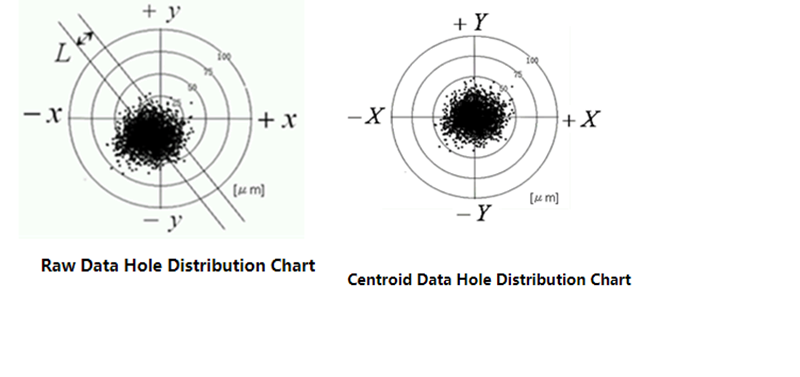

In [9]:
dados_analisaveis['Dev_X_Centroide'] = dados_analisaveis.Dev_X.mean()- dados_analisaveis.Dev_X
dados_analisaveis['Dev_Y_Centroide'] = dados_analisaveis.Dev_Y.mean()- dados_analisaveis.Dev_Y
dados_analisaveis.head()

,Dev_X,Dev_Y,D,Model,Repoint,Dev_X_Centroide,Dev_Y_Centroide
0,-0.0242,0.0238,0.2807,UCKA,0,0.015304,-0.01147
1,-0.0220,0.0099,0.2809,UCKA,0,0.013104,0.00243
2,-0.0368,0.0212,0.2840,UCKA,0,0.027904,-0.00887
3,-0.0220,0.0278,0.2852,UCKA,0,0.013104,-0.01547
4,-0.0021,-0.0035,0.2837,UCKA,0,-0.006796,0.01583


<h2><strong> Realizando uma breve analise estatistica dos dados</strong></h2>

Broca Modelo UCKA

In [10]:
dados_analisaveis[dados_analisaveis['Model']=='UCKA'].describe()

,Dev_X,Dev_Y,D,Repoint,Dev_X_Centroide,Dev_Y_Centroide
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,-0.007723,0.006223,0.282977,2.000000,-0.001173,0.006108
std,0.022605,0.024064,0.005270,1.414261,0.022605,0.024064
min,-0.107100,-0.070200,0.145300,0.000000,-0.094896,-0.079570
25%,-0.023200,-0.011200,0.280000,1.000000,-0.017696,-0.010670
50%,-0.006300,0.004200,0.282900,2.000000,-0.002596,0.008130
75%,0.008800,0.023000,0.285800,3.000000,0.014304,0.023530
max,0.086000,0.091900,0.300300,4.000000,0.098204,0.082530


Broca Modelo UCWA

In [11]:
dados_analisaveis[dados_analisaveis['Model']=='UCWA'].describe()

,Dev_X,Dev_Y,D,Repoint,Dev_X_Centroide,Dev_Y_Centroide
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,-0.010068,0.018438,0.272194,1.999933,0.001173,-0.006108
std,0.032420,0.018950,0.010219,1.414284,0.032420,0.018950
min,-0.128000,-0.070900,0.168300,0.000000,-0.091596,-0.073370
25%,-0.029300,0.005800,0.263700,1.000000,-0.021796,-0.019270
50%,-0.006600,0.018900,0.272600,2.000000,-0.002296,-0.006570
75%,0.012900,0.031600,0.280100,3.000000,0.020404,0.006530
max,0.082700,0.085700,0.297800,4.000000,0.119104,0.083230


<h2><strong> ANÁLISE DE DISPERSÃO (POSIÇÃO DOS FUROS)</strong></h2>

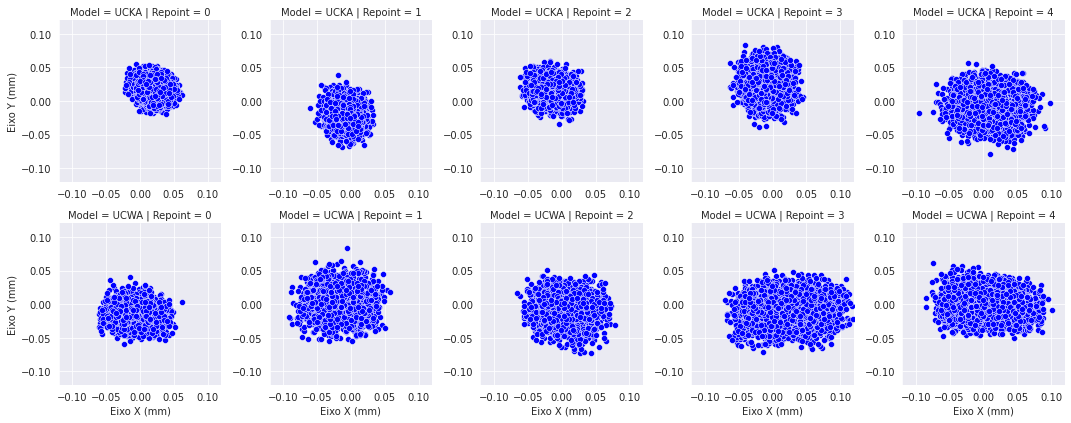

In [12]:
# Definindo o Estilo do Gráfico

sns.set_style("darkgrid") 

# Definindo um grid para a plotagem dos gráficos

g = sns.FacetGrid(dados_analisaveis, col= 'Repoint', row='Model', sharey = False, sharex = False, ylim=(-0.12, 0.12), xlim=(-0.12, 0.12)); 
g = g.map_dataframe(sns.scatterplot, x="Dev_X_Centroide", y="Dev_Y_Centroide",color= 'blue');
g.set_axis_labels('Eixo X (mm)', 'Eixo Y (mm)');
        

<h2><strong> ANÁLISE DE DISTRIBUIÇÃO NORMAL PARA O EIXO X</strong></h2>

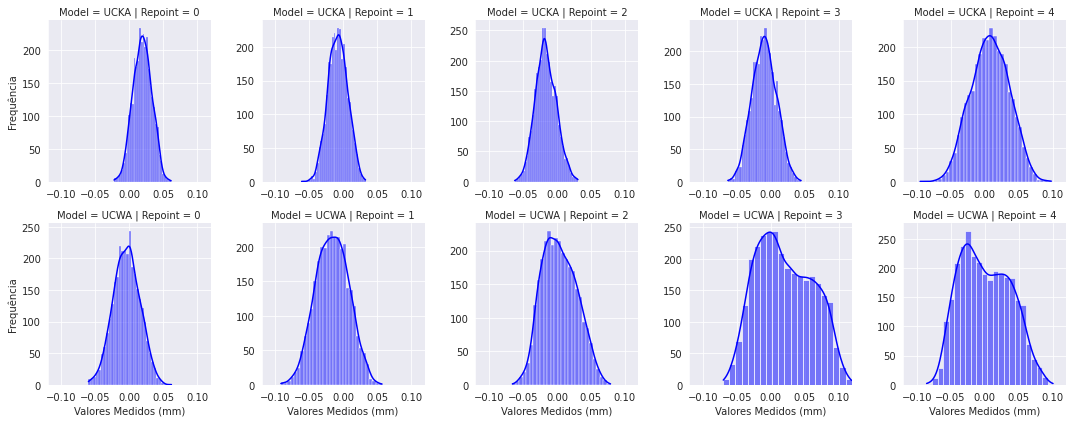

In [13]:
 # Definindo o Estilo do Gráfico

sns.set_style("darkgrid")

# Definindo um grid para a plotagem dos gráficos

g = sns.FacetGrid(dados_analisaveis, col= 'Repoint', row='Model', sharey = False, sharex = False,  xlim=(-0.12, 0.12)); 
g.map_dataframe(sns.histplot, x= 'Dev_X_Centroide', kde = True, color = 'blue');
g.set_axis_labels('Valores Medidos (mm)', 'Frequência');


<h2><strong> ANÁLISE DE DISTRIBUIÇÃO NORMAL PARA O EIXO Y</strong></h2>

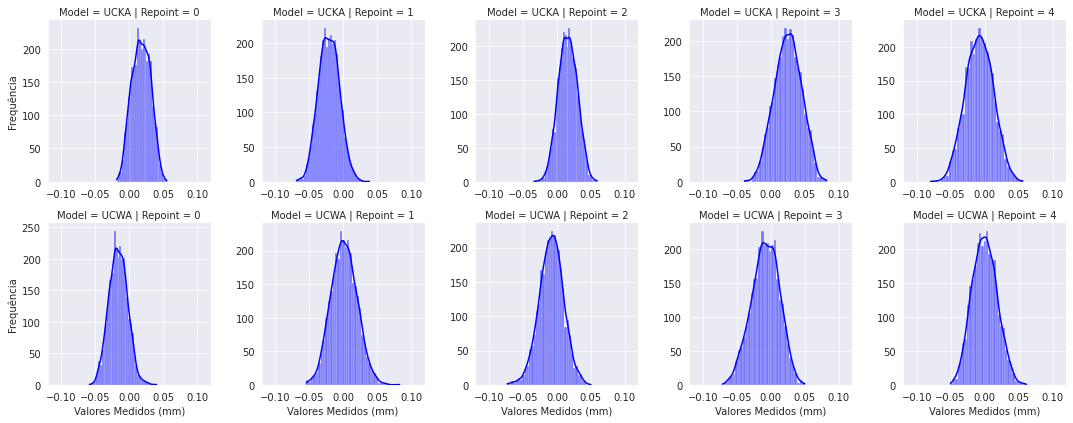

In [14]:
# Definindo o Estilo do Gráfico

sns.set_style("darkgrid") 

# Definindo um grid para a plotagem dos gráficos

g = sns.FacetGrid(dados_analisaveis, col= 'Repoint', row='Model', sharey = False, sharex = False,  xlim=(-0.12, 0.12)); 
g.map_dataframe(sns.histplot, x= 'Dev_Y_Centroide', kde = True, color = 'blue');
g.set_axis_labels('Valores Medidos (mm)', 'Frequência');



<h2><strong> ÍNDICES DE CAPACIDADE DO PROCESSO: CP E CPK </strong></h2>

*  **CP ou Indice de Capacidade:** Para um processo sob controle estatístico (estável), o índice de capacidade determina o que pode ser esperado para o processo em relação às especificações. Um processo centrado, isto é, μ = (1/2)(LIE + LSE) com uma distribuição (estável) normal e com um Cp = 1 produzirá 0,27% dos itens fora de especificação;

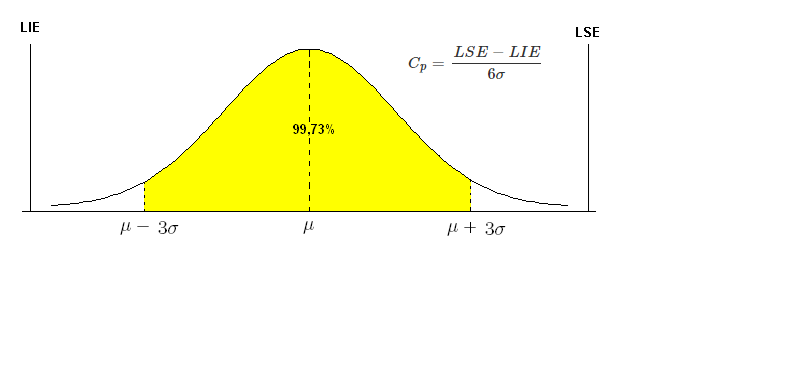



*  **CPK ou Indice de Capabilidade:** Para avaliar mais eficientemente a capacidade do processo foi introduzido no Japão o índice Cpk, que leva em conta não somente a variabilidade do processo como também sua localização com respeito aos limites de especificação.

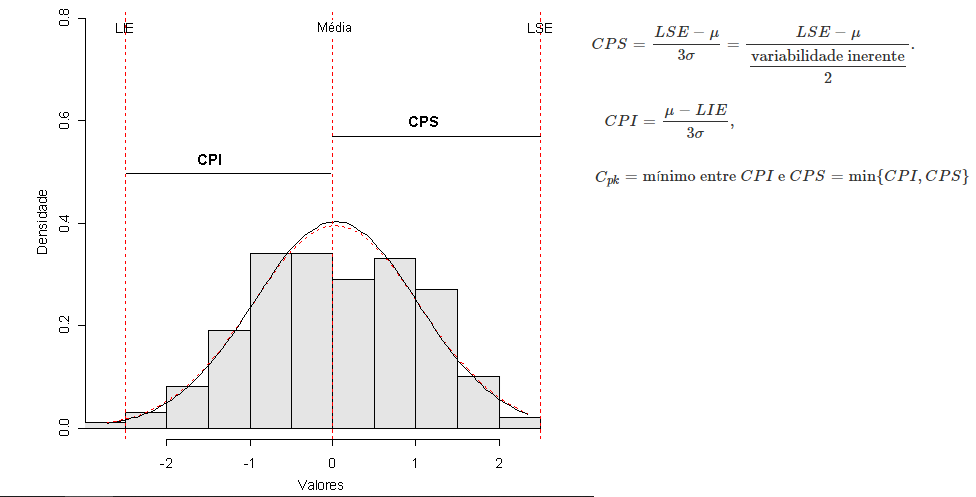

Estarei considerando como ideal CP e CPK >= 1.33 o que representa uma taxa de falha aproxidade de PPM=66.0733.

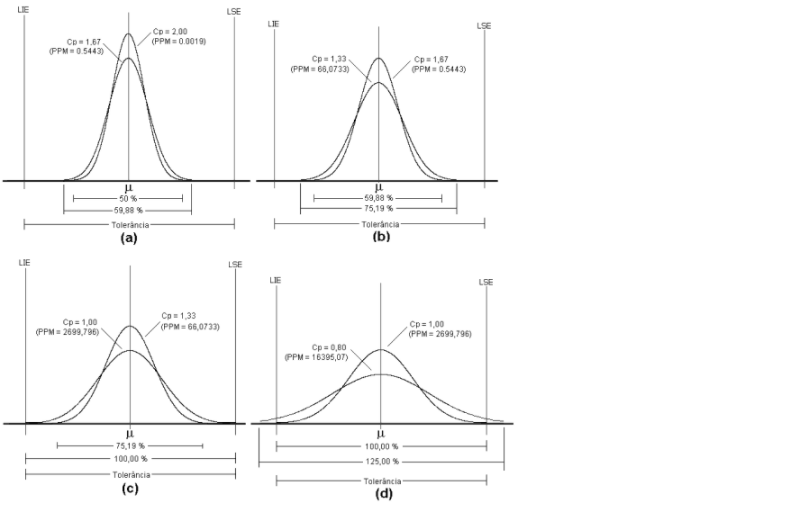


<h2><strong>CP & CPK Broca UCKA</strong></h2>

In [15]:
# Armazenando os dados da broca UCKA em uma nova variável

dados_ucka = dados_analisaveis[dados_analisaveis['Model']=='UCKA'] 

# Tolerâncias:

limite_inferior = -0.075
limite_superior = 0.075


# Calculando as variáveis para o eixo X

med_ucka_x = round(dados_ucka.Dev_X_Centroide.median(),3)
avg_ucka_x = round(dados_ucka.Dev_X_Centroide.mean(), 3)
std_ucka_x = round(dados_ucka.Dev_X_Centroide.std(), 3)
min_ucka_x = round(dados_ucka.Dev_X_Centroide.min(), 3)
max_ucka_x = round(dados_ucka.Dev_X_Centroide.max(), 3)
amp_ucka_x = round((max_ucka_x - min_ucka_x), 3)
cp_x_ucka = round(((limite_superior - limite_inferior)/(6*std_ucka_x)),2)
cps_x_ucka = (limite_superior-avg_ucka_x)/(3*std_ucka_x)
cpi_x_ucka = (avg_ucka_x-limite_inferior)/(3*std_ucka_x)
cpk_x_ucka = round((min(cps_x_ucka, cpi_x_ucka)),2)


# Calculando as variáveis para o eixo Y

med_ucka_y = round(dados_ucka.Dev_Y_Centroide.median(), 3)
avg_ucka_y = round(dados_ucka.Dev_Y_Centroide.mean(), 3)
std_ucka_y = round(dados_ucka.Dev_Y_Centroide.std(), 3)
min_ucka_y = round(dados_ucka.Dev_Y_Centroide.min(), 3)
max_ucka_y = round(dados_ucka.Dev_Y_Centroide.max(), 3)
amp_ucka_y = round((max_ucka_y - min_ucka_y),3)
cp_y_ucka = round(((limite_superior - limite_inferior)/(6*std_ucka_y)), 2)
cps_y_ucka = (limite_superior-avg_ucka_y)/(3*std_ucka_y)
cpi_y_ucka = (avg_ucka_y-limite_inferior)/(3*std_ucka_y)
cpk_y_ucka = round((min(cps_y_ucka, cpi_y_ucka)), 2)

# Imprimindo resultados:

print('Resultados da analise de CP & CPK para Broca UCKA')
print('----------------------/--------------------------')
print('Limite Superior de Especificação:      {}'.format(limite_superior))
print('Limite Inferior de Especificação:      {}'.format(limite_inferior))
print('Deslocamentos Médio no eixo X:         {}'.format(avg_ucka_x))
print('Deslocamentos Médio no eixo Y:         {}'.format(avg_ucka_y))
print('Desvio Padrão no eixo X:               {}'.format(std_ucka_x))
print('Desvio Padrão no eixo Y:               {}'.format(std_ucka_y))
print('Deslocamentos Máximo no eixo X:        {}'.format(max_ucka_x))
print('Deslocamentos Máximo no eixo Y:        {}'.format(max_ucka_y))
print('Deslocamentos Mínimo no eixo Y:        {}'.format(min_ucka_y))
print('Deslocamentos Mínimo no eixo X:        {}'.format(min_ucka_x))
print('Amplitude dos Deslocamentos no eixo X: {}'.format(amp_ucka_x))
print('Amplitude dos Deslocamentos no eixo Y: {}'.format(amp_ucka_y))
print('----------------------/--------------------------')
print('Indice CP no eixo X:                   {}'.format(cp_x_ucka))
print('Indice CP no eixo Y:                   {}'.format(cp_y_ucka))
print('Indice CPK no eixo X:                  {}'.format(cpk_x_ucka))
print('Indice CPK no eixo Y:                  {}'.format(cpk_y_ucka))

Resultados da analise de CP & CPK para Broca UCKA
----------------------/--------------------------
Limite Superior de Especificação:      0.075
Limite Inferior de Especificação:      -0.075
Deslocamentos Médio no eixo X:         -0.001
Deslocamentos Médio no eixo Y:         0.006
Desvio Padrão no eixo X:               0.023
Desvio Padrão no eixo Y:               0.024
Deslocamentos Máximo no eixo X:        0.098
Deslocamentos Máximo no eixo Y:        0.083
Deslocamentos Mínimo no eixo Y:        -0.08
Deslocamentos Mínimo no eixo X:        -0.095
Amplitude dos Deslocamentos no eixo X: 0.193
Amplitude dos Deslocamentos no eixo Y: 0.163
----------------------/--------------------------
Indice CP no eixo X:                   1.09
Indice CP no eixo Y:                   1.04
Indice CPK no eixo X:                  1.07
Indice CPK no eixo Y:                  0.96


<h2><strong>CP & CPK Broca UCWA</strong></h2>

In [16]:
# Armazenando os dados da broca UCWA em uma nova variável

dados_ucwa = dados_analisaveis[dados_analisaveis['Model']=='UCWA']


# Tolerâncias:

limite_inferior = -0.075
limite_superior = 0.075



# Calculando as variáveis para o eixo X

med_ucwa_x = round(dados_ucwa.Dev_X_Centroide.median(), 3)
avg_ucwa_x = round(dados_ucwa.Dev_X_Centroide.mean(), 3)
std_ucwa_x = round(dados_ucwa.Dev_X_Centroide.std(), 3)
min_ucwa_x = round(dados_ucwa.Dev_X_Centroide.min(), 3)
max_ucwa_x = round(dados_ucwa.Dev_X_Centroide.max(), 3)
amp_ucwa_x = round((max_ucwa_x - min_ucwa_x), 3)
cp_x_ucwa = round(((limite_superior - limite_inferior)/(6*std_ucwa_x)), 2)
cps_x_ucwa = (limite_superior-avg_ucwa_x)/(3*std_ucwa_x)
cpi_x_ucwa = (avg_ucwa_x-limite_inferior)/(3*std_ucwa_x)
cpk_x_ucwa = round((min(cps_x_ucwa, cpi_x_ucwa)), 2)


# Calculando as variáveis para o eixo Y

med_ucwa_y = round(dados_ucwa.Dev_Y_Centroide.median(), 3)
avg_ucwa_y = round(dados_ucwa.Dev_Y_Centroide.mean(), 3)
std_ucwa_y = round(dados_ucwa.Dev_Y_Centroide.std(), 3)
min_ucwa_y = round(dados_ucwa.Dev_Y_Centroide.min(), 3)
max_ucwa_y = round(dados_ucwa.Dev_Y_Centroide.max(), 3)
amp_ucwa_y = round((max_ucwa_y - min_ucwa_y), 3)
cp_y_ucwa = round(((limite_superior - limite_inferior)/(6*std_ucwa_y)),2)
cps_y_ucwa = (limite_superior-avg_ucwa_y)/(3*std_ucwa_y)
cpi_y_ucwa = (avg_ucwa_y-limite_inferior)/(3*std_ucwa_y)
cpk_y_ucwa = round((min(cps_y_ucwa, cpi_y_ucwa)),2)

# Imprimindo resultados:

print('Resultados da analise de CP & CPK para Broca UCWA')
print('----------------------/--------------------------')
print('Limite Superior de Especificação:      {}'.format(limite_superior))
print('Limite Inferior de Especificação:      {}'.format(limite_inferior))
print('Deslocamentos Médio no eixo X:         {}'.format(avg_ucwa_x))
print('Deslocamentos Médio no eixo Y:         {}'.format(avg_ucwa_y))
print('Desvio Padrão no eixo X:               {}'.format(std_ucwa_x))
print('Desvio Padrão no eixo Y:               {}'.format(std_ucwa_y))
print('Deslocamentos Máximo no eixo X:        {}'.format(max_ucwa_x))
print('Deslocamentos Máximo no eixo Y:        {}'.format(max_ucwa_y))
print('Deslocamentos Minimo no eixo Y:        {}'.format(min_ucwa_y))
print('Deslocamentos Minimo no eixo X:        {}'.format(min_ucwa_x))
print('Amplitude dos Deslocamentos no eixo X: {}'.format(amp_ucwa_x))
print('Amplitude dos Deslocamentos no eixo Y: {}'.format(amp_ucwa_y))
print('----------------------/--------------------------')
print('Indice CP no eixo X:                   {}'.format(cp_x_ucwa))
print('Indice CP no eixo Y:                   {}'.format(cp_y_ucwa))
print('Indice CPK no eixo X:                  {}'.format(cpk_x_ucwa))
print('Indice CPK no eixo Y:                  {}'.format(cpk_y_ucwa))

Resultados da analise de CP & CPK para Broca UCWA
----------------------/--------------------------
Limite Superior de Especificação:      0.075
Limite Inferior de Especificação:      -0.075
Deslocamentos Médio no eixo X:         0.001
Deslocamentos Médio no eixo Y:         -0.006
Desvio Padrão no eixo X:               0.032
Desvio Padrão no eixo Y:               0.019
Deslocamentos Máximo no eixo X:        0.119
Deslocamentos Máximo no eixo Y:        0.083
Deslocamentos Minimo no eixo Y:        -0.073
Deslocamentos Minimo no eixo X:        -0.092
Amplitude dos Deslocamentos no eixo X: 0.211
Amplitude dos Deslocamentos no eixo Y: 0.156
----------------------/--------------------------
Indice CP no eixo X:                   0.78
Indice CP no eixo Y:                   1.32
Indice CPK no eixo X:                  0.77
Indice CPK no eixo Y:                  1.21


<h2><strong> Visualizando os resultados da Broca UCKA</strong></h2>

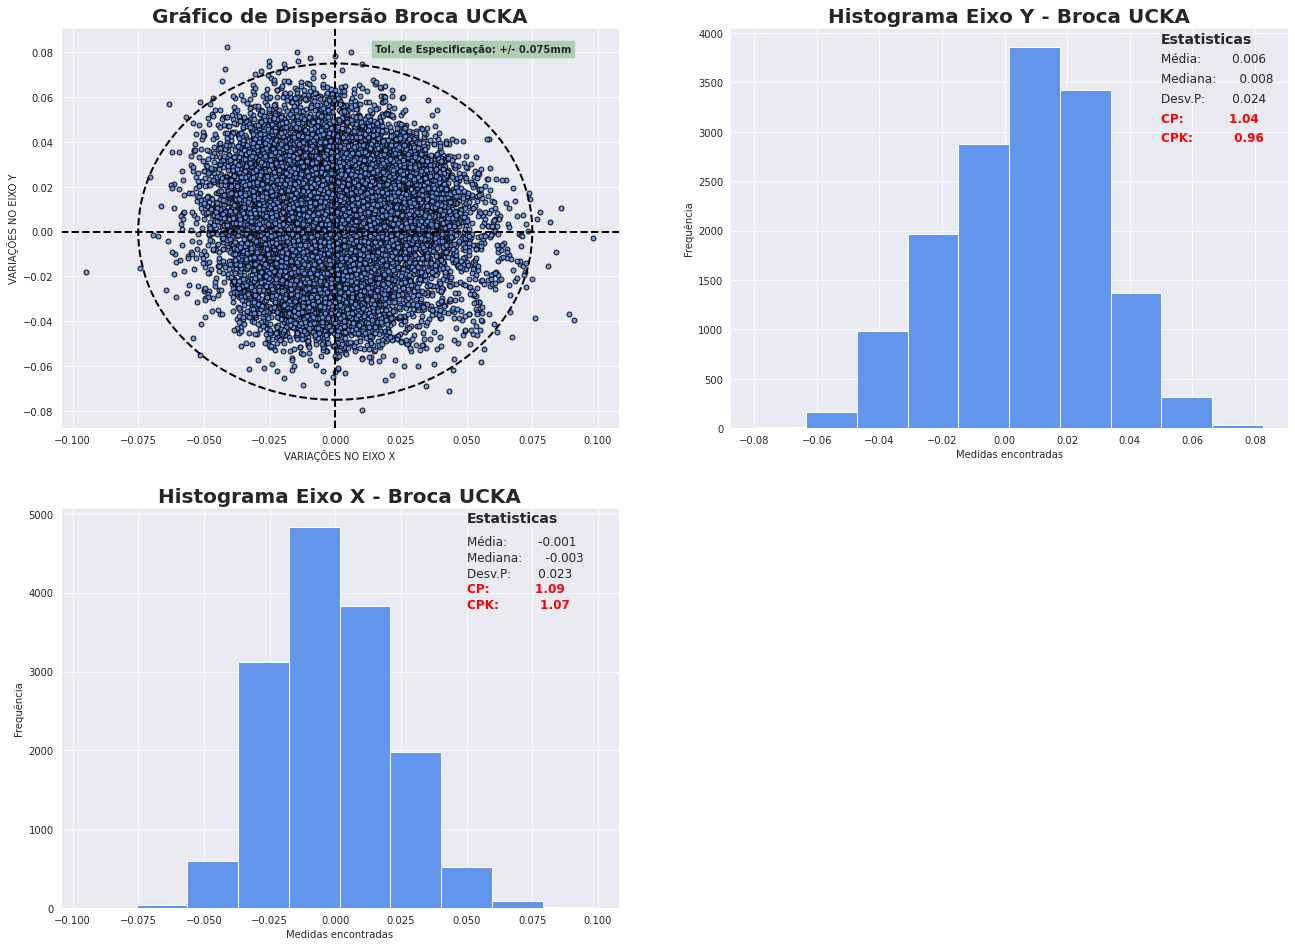

In [17]:
fig = plt.figure(figsize=(22, 25))


# Broca UCKA

# Gráfico de Dispersão

ax1 = plt.subplot(3, 2, 1)
ax1.scatter(dados_ucka.Dev_X_Centroide, dados_ucka.Dev_Y_Centroide, c= 'cornflowerblue', alpha = 0.9, s = 24, linewidths= 1, edgecolors='black')
ax1.set_title('Gráfico de Dispersão Broca UCKA', fontsize=20, fontweight = 'bold')
ax1.set_xlabel('VARIAÇÕES NO EIXO X')
ax1.set_ylabel('VARIAÇÕES NO EIXO Y')

# Inserindo linhas de referença do centro (x0y0)

ax1.axhline(0, color= 'black', lw= 2, ls='--')
ax1.axvline(0, color= 'black', lw=2, ls='--')

# Inserindo o raio de tolerância do processo 

cir = Circle((0,0), 0.075, color='black', lw=2, ls='--', fill = False, zorder= 10)
ax1 = plt.gca().add_patch(cir);
ax1 = plt.text(0.015, 0.08, 'Tol. de Especificação: +/- 0.075mm', bbox ={'facecolor': 'forestgreen', 'alpha': 0.3}, fontweight = 'bold')


# Distribuição Normal Eixo X

ax1_2 = plt.subplot(3, 2, 3)
ax1_2 = plt.hist(dados_ucka.Dev_X_Centroide, color= 'cornflowerblue')
ax1_2 = plt.title('Histograma Eixo X - Broca UCKA', fontsize=20, fontweight = 'bold')
ax1_2= plt.ylabel('Frequência')
ax1_2 = plt.xlabel('Medidas encontradas')
ax1_2 = plt.text(0.05, 4900,'Estatisticas', fontsize = 14, fontweight = 'bold')
ax1_2 = plt.text(0.05, 4600,'Média:        {}'.format(avg_ucka_x), fontsize = 12)
ax1_2 = plt.text(0.05, 4400,'Mediana:      {}'.format(med_ucka_x), fontsize = 12)
ax1_2 = plt.text(0.05, 4200,'Desv.P:       {}'.format(std_ucka_x), fontsize = 12)
ax1_2 = plt.text(0.05, 4000,'CP:           {}'.format(cp_x_ucka), fontsize = 12, color= 'red', fontweight = 'bold')
ax1_2 = plt.text(0.05, 3800,'CPK:          {}'.format(cpk_x_ucka), fontsize = 12, color= 'red', fontweight = 'bold')

# Distribuição Normal Eixo Y

ax1_3 = plt.subplot(3, 2, 2)
ax1_3 = plt.hist(dados_ucka.Dev_Y_Centroide, color= 'cornflowerblue')
ax1_3 = plt.title('Histograma Eixo Y - Broca UCKA', fontsize=20, fontweight = 'bold')
ax1_3 = plt.ylabel('Frequência')
ax1_3 = plt.xlabel('Medidas encontradas')
ax1_3 = plt.text(0.05, 3900,'Estatisticas', fontsize = 14, fontweight = 'bold')
ax1_3 = plt.text(0.05, 3700,'Média:        {}'.format(avg_ucka_y), fontsize = 12)
ax1_3 = plt.text(0.05, 3500,'Mediana:      {}'.format(med_ucka_y), fontsize = 12)
ax1_3 = plt.text(0.05, 3300,'Desv.P:       {}'.format(std_ucka_y), fontsize = 12)
ax1_3 = plt.text(0.05, 3100,'CP:           {}'.format(cp_y_ucka), fontsize = 12, color= 'red', fontweight = 'bold')
ax1_3 = plt.text(0.05, 2900,'CPK:          {}'.format(cpk_y_ucka), fontsize = 12, color= 'red', fontweight = 'bold')


plt.show()

<h2><strong> Visualizando os resultados da Broca UCWA</strong></h2>

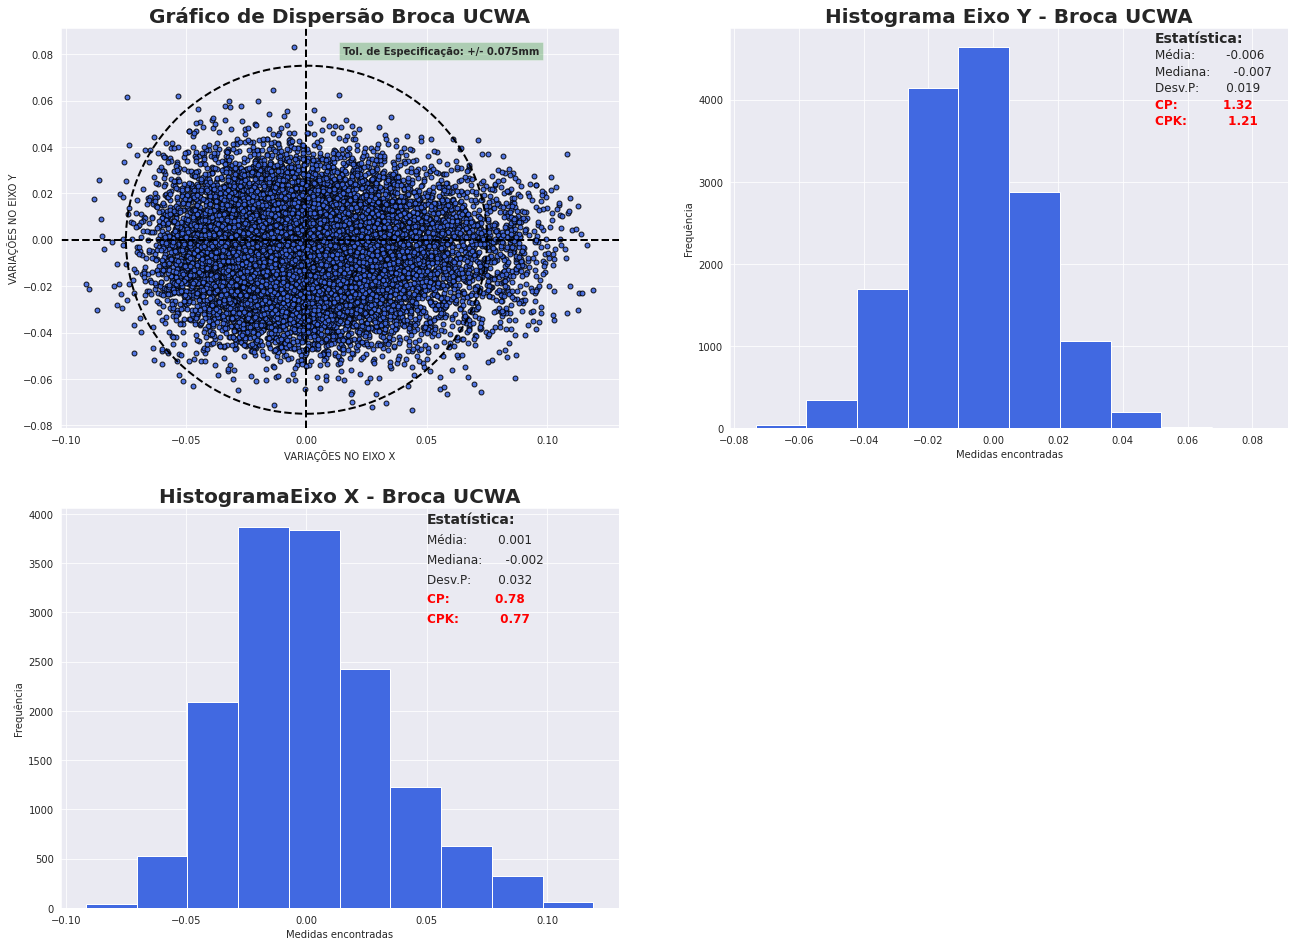

In [18]:
fig = plt.figure(figsize=(22, 25))


# Broca UCWA

# Gráfico de Dispersão

ax2 = plt.subplot(3, 2, 1)
ax2.scatter(dados_ucwa.Dev_X_Centroide, dados_ucwa.Dev_Y_Centroide, c= 'royalblue', alpha = 0.9, s = 24, linewidths= 1, edgecolors='black')
ax2.set_title('Gráfico de Dispersão Broca UCWA',fontsize=20, fontweight = 'bold')
ax2.set_xlabel('VARIAÇÕES NO EIXO X')
ax2.set_ylabel('VARIAÇÕES NO EIXO Y')

# Inserindo linhas de referença do centro (x0y0)

ax2.axhline(0, color= 'black', lw= 2, ls='--')
ax2.axvline(0, color= 'black', lw=2, ls='--')

# Inserindo o raio de tolerância do processo 

cir = Circle((0,0), 0.075, color='black', lw=2, ls='--', fill = False, zorder= 10)
ax2 = plt.gca().add_patch(cir);
ax2 = plt.text(0.015, 0.08, 'Tol. de Especificação: +/- 0.075mm', bbox ={'facecolor': 'forestgreen', 'alpha': 0.3}, fontweight = 'bold')


# Histograma Eixo X

ax2_2 = plt.subplot(3, 2, 3)
ax2_2= plt.hist(dados_ucwa.Dev_X_Centroide, color= 'royalblue')
ax2_2 = plt.title('HistogramaEixo X - Broca UCWA',fontsize=20, fontweight = 'bold')
ax2_2 = plt.ylabel('Frequência')
ax2_2 = plt.xlabel('Medidas encontradas')
ax2_2 = plt.text(0.05, 3900,'Estatística:', fontsize = 14, fontweight = 'bold')
ax2_2 = plt.text(0.05, 3700,'Média:        {}'.format(avg_ucwa_x), fontsize = 12)
ax2_2 = plt.text(0.05, 3500,'Mediana:      {}'.format(med_ucwa_x), fontsize = 12)
ax2_2 = plt.text(0.05, 3300,'Desv.P:       {}'.format(std_ucwa_x), fontsize = 12)
ax2_2 = plt.text(0.05, 3100,'CP:           {}'.format(cp_x_ucwa), fontsize = 12, color= 'red', fontweight = 'bold')
ax2_2 = plt.text(0.05, 2900,'CPK:          {}'.format(cpk_x_ucwa), fontsize = 12, color= 'red', fontweight = 'bold')

# Histograma Eixo X

ax2_3 = plt.subplot(3, 2, 2)
ax2_3 = plt.hist(dados_ucwa.Dev_Y_Centroide, color= 'royalblue')
ax2_3 = plt.title('Histograma Eixo Y - Broca UCWA',fontsize=20, fontweight = 'bold')
ax2_3 = plt.ylabel('Frequência')
ax2_3 = plt.xlabel('Medidas encontradas')
ax2_3 = plt.text(0.05, 4700,'Estatística:', fontsize = 14, fontweight = 'bold')
ax2_3 = plt.text(0.05, 4500,'Média:        {}'.format(avg_ucwa_y), fontsize = 12)
ax2_3 = plt.text(0.05, 4300,'Mediana:      {}'.format(med_ucwa_y), fontsize = 12)
ax2_3 = plt.text(0.05, 4100,'Desv.P:       {}'.format(std_ucwa_y), fontsize = 12)
ax2_3 = plt.text(0.05, 3900,'CP:           {}'.format(cp_y_ucwa), fontsize = 12, color= 'red', fontweight = 'bold')
ax2_3 = plt.text(0.05, 3700,'CPK:          {}'.format(cpk_y_ucwa), fontsize = 12, color= 'red', fontweight = 'bold')


plt.show()

<h2><strong> Conclusão:</strong></h2>

Conclui-se que ambos os modelos de Brocas estão rejeitados  para este teste, por não apresentarem Índices de Capacidades **(CP & CPK)** superiores ou iguáis a **1.33**, porém cabem novos ciclos de testes revisando parâmetros na busca de melhores resultados.

